In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

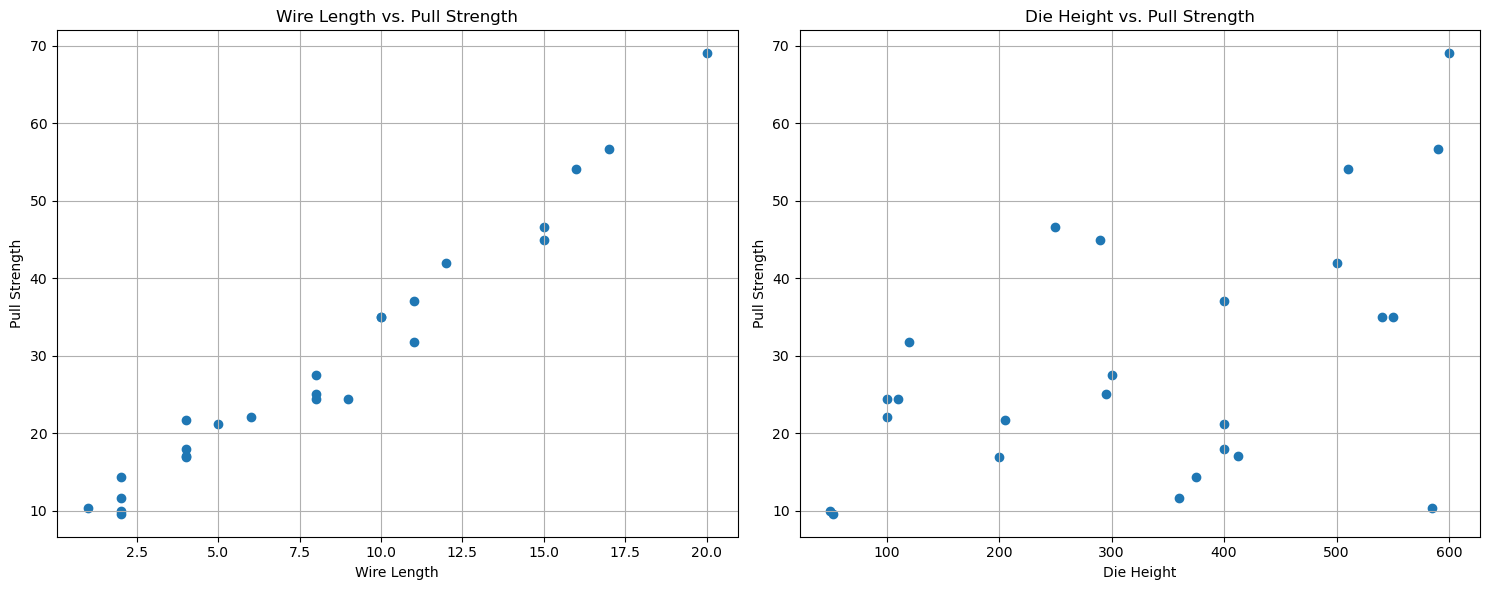

In [2]:
##
# Load the dataset:
#
dataframe = pd.read_csv("../linear-regression/dataset/wirepullstrength.csv")
X1 = dataframe["Wire Length"]
X2 = dataframe["Die Height"]
Y = dataframe["Pull Strength"]

##
# Visualize the dataset:
#
fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].set_title('Wire Length vs. Pull Strength')
axs[0].set_xlabel('Wire Length')
axs[0].set_ylabel('Pull Strength')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].set_title('Die Height vs. Pull Strength')
axs[1].set_xlabel('Die Height')
axs[1].set_ylabel('Pull Strength')
axs[1].grid(True)

fig.tight_layout()
plt.show()

## Least Square Method
For n-dimensional data ($\mathbf{X}, \mathbf{Y} \in \mathbb{R}^{m\times n}$):

$$
\begin{aligned}
\mathbf{Y} &= \beta_0 + \beta_1\mathbf{X} \\
\beta_1 &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y} \\
\beta_0 &= E[\mathbf{Y}] - \beta_1\mathbf{X}
\end{aligned}
$$

For 1-dimensional data ($\mathbf{x}, \mathbf{y} \in \mathbb{R}^{m}$):
$$
\begin{aligned}
\mathbf{y} &= \beta_0 + \beta_1\mathbf{x} \\
\beta_1 &= \frac{\sum_{i = 1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^m (x_i - \bar{x})^2} \\
\beta_0 &= \bar{y} - \beta_1\bar{x}
\end{aligned}
$$

In [3]:
##
# Simple Linear Regression Using Least Square Method (1-dimensional):
#
def one_dimensional_least_square(X, Y):
    numerator = np.dot([(x - np.mean(X)) for x in X], [(y - np.mean(Y)) for y in Y])
    denominator = np.sum([(x - np.mean(X)) ** 2 for x in X])
    beta_1 = numerator / denominator
    beta_0 = np.mean(Y) - beta_1 * np.mean(X)
    return beta_0, beta_1

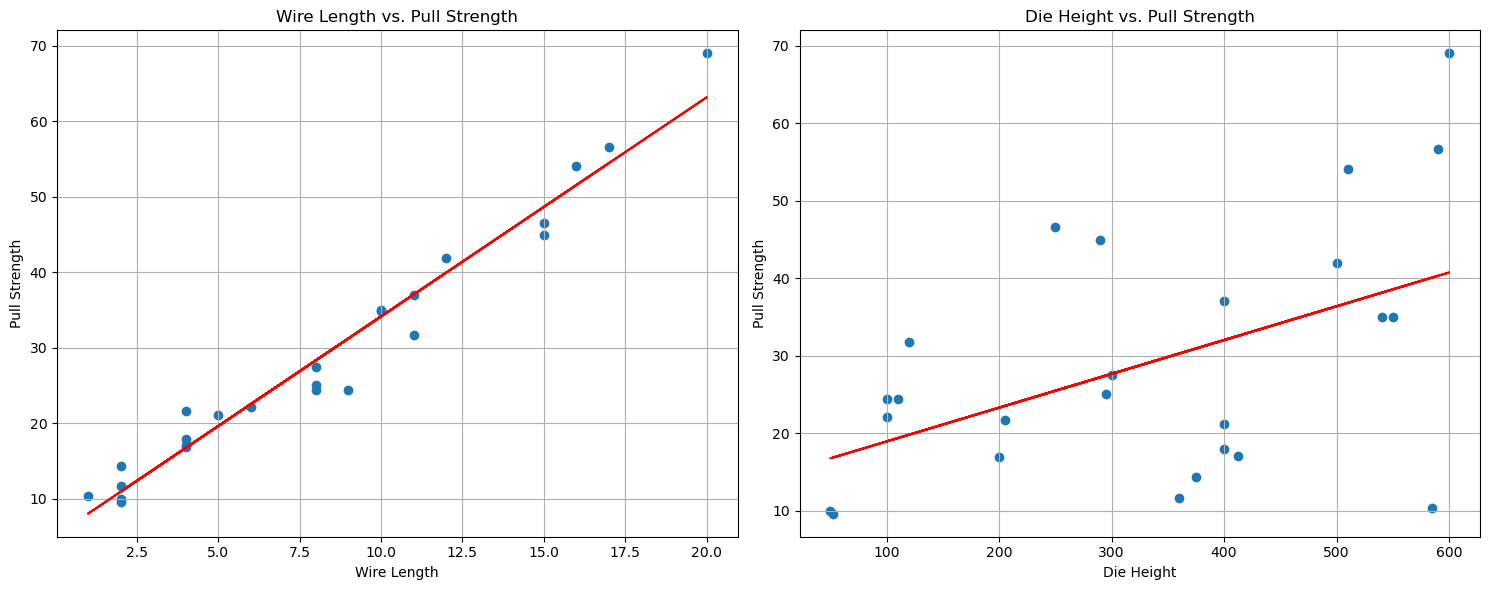

In [4]:
beta_0_X1, beta_1_X1 = one_dimensional_least_square(X1, Y)
Yhat_1 = beta_0_X1 + beta_1_X1 * X1
f1 = lambda x: beta_0_X1 + beta_1_X1 * x

beta_0_X2, beta_1_X2 = one_dimensional_least_square(X2, Y)
Yhat_2 = beta_0_X2 + beta_1_X2 * X2
f2 = lambda x: beta_0_X2 + beta_1_X2 * x

fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].plot(X1, f1(X1), color = 'red')
axs[0].set_title('Wire Length vs. Pull Strength')
axs[0].set_xlabel('Wire Length')
axs[0].set_ylabel('Pull Strength')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].plot(X2, f2(X2), color = 'red')
axs[1].set_title('Die Height vs. Pull Strength')
axs[1].set_xlabel('Die Height')
axs[1].set_ylabel('Pull Strength')
axs[1].grid(True)

fig.tight_layout()
plt.show()

## Gradient Descent Method:
Our objective is to minimize the scaled mean of squared residuals.
$$
\text{min} \quad \frac{1}{2m}\sum_{i = 1}^m(\beta_0 + \beta_1x_i - y_i)^2
$$

The gradient descent method has the following follows:
* Step 1: initialize $\beta_0$ and $\beta_1$. The intial values of the parameters $\beta_1$ and $\beta_0$ are usually drawn from a truncated normal distribution with zero mean and a specific standard deviation $\mathcal{N}(0, \sigma = \sqrt{\frac{2}{m}})$
* Step 2: compute the gradient of the loss function in respect to $\beta_0$ and $\beta_1$. In this scenario, the loss function is the mean of squared residuals:
$$
\begin{aligned}
\nabla_{\beta_1} &= \frac{1}{m}\sum_{i=1}^m(\beta_0 + \beta_1x_i - y_i)(x_i) \\
\nabla_{\beta_0} &= \frac{1}{m}\sum_{i=1}^m(\beta_0 + \beta_1x_i - y_i) \\
\end{aligned}
$$
* Step 3: update $\beta_0$ and $\beta_1$ iteratively. The parameters at the $k + 1$ iteration equal to the parameters at the $k$ iteration minus the learning step, which is the product of the learning rate $\eta$ and the gradients.
$$
\begin{aligned}
\beta_1^{k+1} &= \beta_1^{k} - \eta\nabla_{\beta_1}  \\
\beta_0^{k+1} &= \beta_0^{k} - \eta\nabla_{\beta_0}  \\
\end{aligned}
$$


In [15]:
##
# Simple linear regression using gradient descent:
#
def initializer(X, Y, type='he_norm'):
  """
  Initializes the weights of a linear regression model.
  """
  if type == 'zero':
    weight = np.zeros(Y.shape[0])
  elif type == 'he_norm':
    weight = np.random.normal(loc = 0, scale = np.sqrt(2 / len(Y)))
  else:
    raise ValueError('Invalid initialization type: {}'.format(type))

  return weight

def compute_gradients(X, Y, beta_0, beta_1):
  """
  Computes the gradients of the loss function with respect to the weights of a
  linear regression model.
  """
  L = 1 / (2 * len(Y)) * ((beta_0 + beta_1 * X) - Y)**2
  dLdb1 = 1 / len(Y) * np.dot((beta_0 + beta_1 * X) - Y, X)
  dLdb0 = 1 / len(Y) * np.sum((beta_0 + beta_1 * X) - Y)
  
  return dLdb0, dLdb1, L

def gradient_descent(X, Y, lr, num_iter):
  """
  Trains a linear regression model using gradient descent.
  """

  beta_0 = initializer(X, Y, type = 'he_norm')
  beta_1 = initializer(X, Y, type = 'he_norm')

  for i in range(num_iter + 1):
    dLdb0, dLdb1, L = compute_gradients(X, Y, beta_0, beta_1)
    beta_0 -= lr * dLdb0
    beta_1 -= lr * dLdb1

  return beta_0, beta_1

In [25]:
beta_0_X1, beta_1_X1 = gradient_descent(X1, Y, lr = 0.01, num_iter = 1000, print_loss = True)
f1 = lambda x: beta_0_X1 + beta_1_X1 * x

In [26]:
beta_0_X2, beta_1_X2 = gradient_descent(X2, Y, lr = 0.00001, num_iter = 1000, print_loss = True)
f2 = lambda x: beta_0_X2 + beta_1_X2 * x

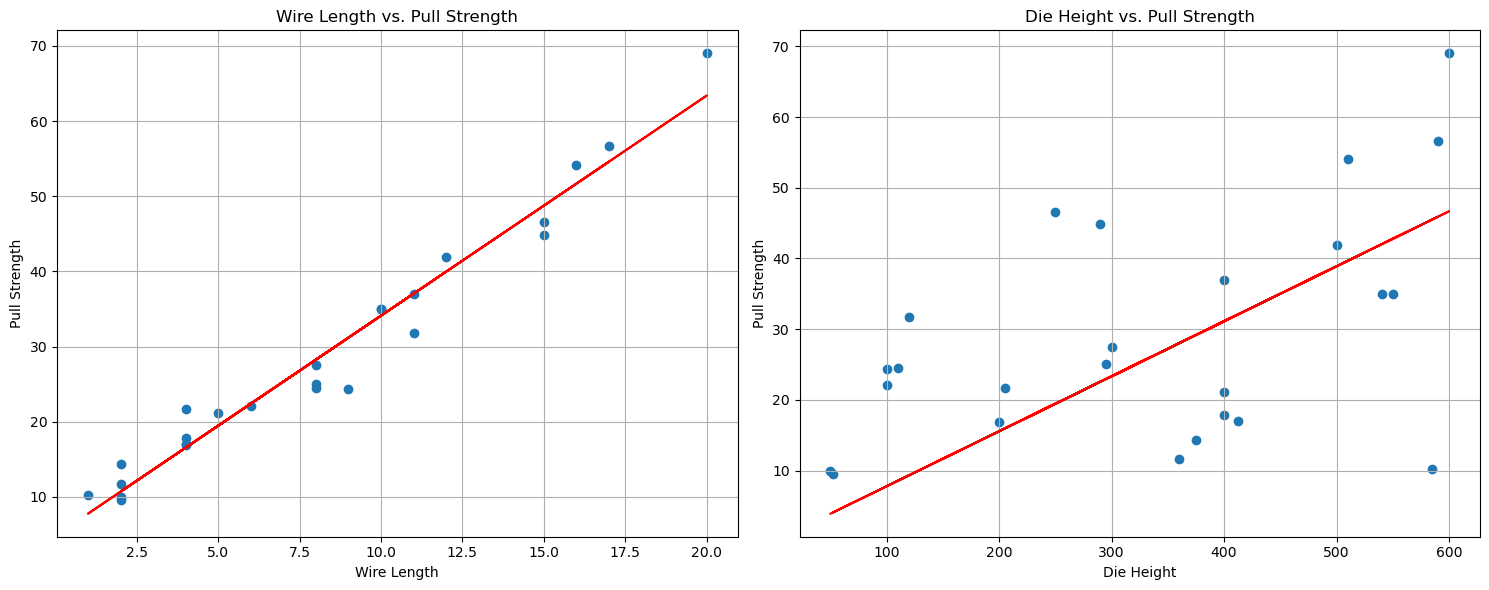

In [27]:
fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].plot(X1, f1(X1), color = 'red')
axs[0].set_title('Wire Length vs. Pull Strength')
axs[0].set_xlabel('Wire Length')
axs[0].set_ylabel('Pull Strength')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].plot(X2, f2(X2), color = 'red')
axs[1].set_title('Die Height vs. Pull Strength')
axs[1].set_xlabel('Die Height')
axs[1].set_ylabel('Pull Strength')
axs[1].grid(True)

fig.tight_layout()
plt.show()